# European Soccer Database
## by Ahmad Reda

## Preliminary Wrangling

> This database contains +25,000 european Soccer (Football) matches along with +10,000 players' data and their attirbutes. It covers seasons from 2008 to 2016 in 11 european countries including each team of the lead leauge and the teams' attributes. The whole database are provided through Kaggle datasets as a stort of a databse file containing different linked tables. More information is provided through the [database link](https://www.kaggle.com/mkg2020/exploring-the-european-soccer-database/notebook). This project will focus on the player's aspects and attributes only.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sqlite3

sb.set_style('darkgrid')
%matplotlib inline

The database contains seven tables, the two table of interest will be loaded:

In [2]:
# read the first table
con = sqlite3.connect("database.sqlite")
df_player = pd.read_sql_query("SELECT * from Player", con)
con.close()
# read the second table
con = sqlite3.connect("database.sqlite")
df_att = pd.read_sql_query("SELECT * from Player_Attributes", con)
con.close()

Let's create a function to explore the two tables:

In [3]:
def df_summary(df):
    '''
    Argument: df as a dataframe
    Usage: gives a summary about the dataframe (Number of rows and columns, datatypes, descriptive statistics,
    check for duplication, and display some rows)
    Output: No return
    '''
    # display all columns
    pd.set_option('display.max_columns', None)
    
    print('Number of rows = {}\nNumber of columns = {}'.format(df.shape[0], df.shape[1]))
    print('-'*30)
    print('Columns info:')
    print(df.info())
    print('-'*30)
    print('Check for duplicates:')
    print(df.duplicated().value_counts())
    print('-'*30)
    print('Summary statistics:')
    print(df.describe())
    print('-'*30)
    print('First five rows:')
    print(df.head())
    print('-'*30)
    print('Last five rows:')
    print(df.tail())
    print('-'*30)

The players' table:

In [4]:
df_summary(df_player)

Number of rows = 11060
Number of columns = 7
------------------------------
Columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
None
------------------------------
Check for duplicates:
False    11060
dtype: int64
------------------------------
Summary statistics:
                 id  player_api_id  player_fifa_api_id        height  \
count  11060.000000   11060.000000        11060.000000  11060.000000   
mean    5537.511

> The Player table contains 11060 **distinct palyer** with an ID of each row. Each player is associated to two different IDs (API ID and FIFA API ID). There are 4 other columns that give the player name, birthday, height, and weight. **This table has no null values**.

> By looking into summary statistics, the numerical values are reasonable.

> Finally, the datatypes seem to be correct here with heights in cms and weights in pounds.

The attributes' table:

In [5]:
df_summary(df_att)

Number of rows = 183978
Number of columns = 42
------------------------------
Columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265

> The player attributes table continas 183978 **distinct** rows of player attributes like overall rating, preferred_foot, crossing skills score, penalities siklls score, and much more. There are 38 different attributes which are explained through [FIFA play encyclopedia](https://www.fifplay.com/encyclopedia/player-attributes/) **with small null values**. The remaining columns are IDs (Row ID, player FIFA API ID, player API ID) which can be used to link with other tables. Each distict player can have more than one row of his attributes on diffrent dates which is indicated in the date column.

> By looking into summary statistics, the numerical values are reasonable.

The datatypes seem to be correct here but they need more investigation for the three attributes with string values:

In [6]:
print(df_att['preferred_foot'].value_counts())
print('-'*30)
print(df_att['attacking_work_rate'].value_counts())
print('-'*30)
print(df_att['defensive_work_rate'].value_counts())

right    138409
left      44733
Name: preferred_foot, dtype: int64
------------------------------
medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64
------------------------------
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64


> The preferred foot column is entered correctly, but the attacking and defensive work rate columns have wrong enteries. So, we have two options here, to drop these two columns or drop the rows with wrong enteries.

Let's drop the rows:

In [7]:
# Drop the rows with wrong entries from the attributes' table
correct_entries = ['low', 'medium', 'high']
df_att = df_att[df_att['attacking_work_rate'].isin(correct_entries)]
df_att = df_att[df_att['defensive_work_rate'].isin(correct_entries)]
# Drop the rows with nan values from the attributes' table
df_att.dropna(inplace=True)

### Main features of interest:

> First, the distribution of age and weight of players. Second, the relation between these two variables. Third, the relation between the age and some selected attributes from the second table. Finally, the realtion between different attributes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The player's table contains the birthday of each player which can be used to get the age. Then by joining the two tables, other attributes can be related to the age of the player's by calculating the age of each player at the time of the recorded attribute.

In [8]:
# Change date columns to datetime
df_player['birthday'] = pd.to_datetime(df_player['birthday'])
df_att['date'] = pd.to_datetime(df_att['date'])
# extract player's year of birth from birthdate
df_player['birthyear'] = df_player['birthday'].dt.year
# add the player's age to the player's table
df_player['age'] = 2016 - df_player['birthyear']
# add the player's age to the attributes table
df_att['age'] = (df_att['date'].dt.year - 
                 df_att['player_api_id'].map(df_player.set_index('player_api_id')['birthyear']))
# clean the dataframe if mapping returns nan
df_att.dropna(inplace=True)

## Univariate Exploration

Let's get the distribution for some of the factors that affect the player's overall rating.

In [9]:
def distribution(df, label, class_width):
    '''
    The function takes df as pandas dataframe,
    and the label as string to indicate the column name,
    and the class_width as integer,
    then plots the histogram of the given variable.
    '''
    x = df[label]
    bins = np.arange(x.min(), x.max()+1, class_width)
    plt.figure(figsize=(10,6))
    plt.hist(data = df, x = label, bins = bins)
    plt.title(f'{label.capitalize().replace("_", " ")} distribution', fontsize=16)
    plt.xlabel(f'{label.capitalize().replace("_", " ")}', fontsize=12)
    plt.ylabel('Count', fontsize=12);

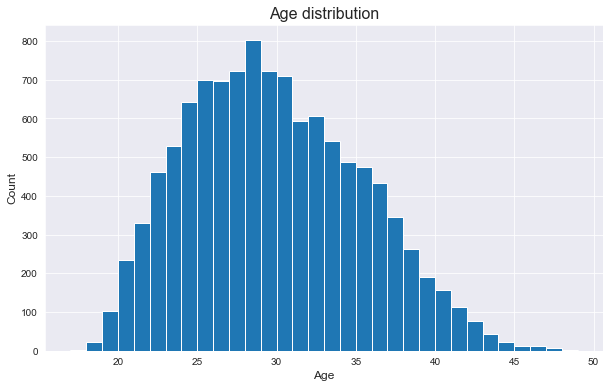

In [10]:
distribution(df_player, 'age', 1)

> This plot shows a slighty right-skewed normal curve for the age distribution with a mode of 28 years. However, the curve is skewed, it does not indicate any outliers.

Let's see the weight distribution

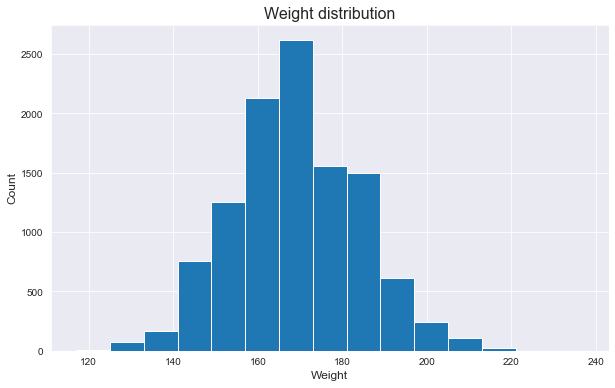

In [11]:
distribution(df_player, 'weight', 8)

> This plot shows a normal curve, as expected, for the wieght distribution with a mode of about 170 lbs.

Before to see the correlation between the two variables, let's discover some of the player's attributes. 

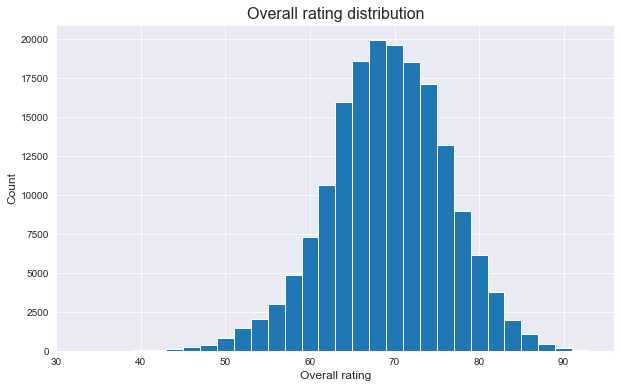

In [12]:
distribution(df_att, 'overall_rating', 2)

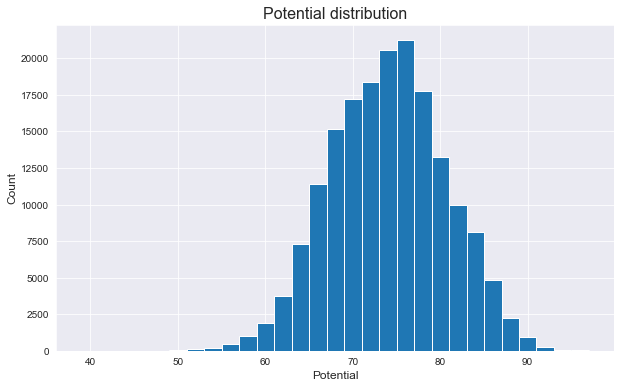

In [13]:
distribution(df_att, 'potential', 2)

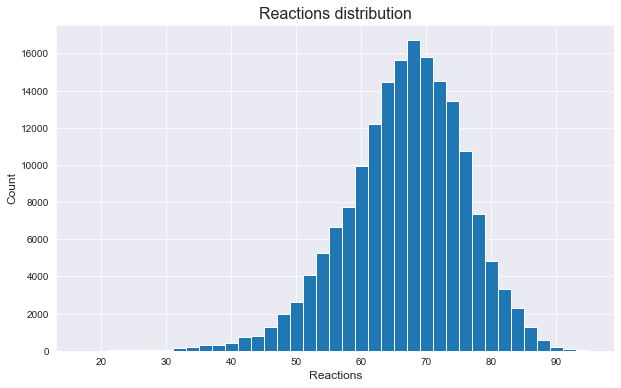

In [14]:
distribution(df_att, 'reactions', 2)

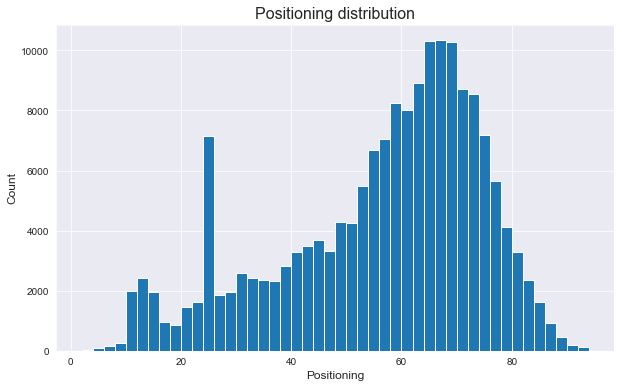

In [15]:
distribution(df_att, 'positioning', 2)

> The attributes show steady distribution of left-skewed normal distributiong except for the positioning attribute it shows bimodal or even trimodal distribution which needs more investgation for the reason that happened as it might be a wrong entry or a default value for missing information.

Let's discover the distribution of the attack and defense attributes.

In [16]:
def distribution_2(df, label, order=True):
    '''
    The function takes df as pandas dataframe,
    and the label as string to indicate the column name,
    and order as boolean to account for the ordinal parameter,
    then plots the bar chart of the given variable.
    '''
    x = df[label]
    if order:
        # if it's ordinal, sort
        locations = ['low', 'medium', 'high']
        heights = [x.value_counts()[locations][word] for word in locations]
    else:
        # if it's nominal or sorting is not required
        heights = x.value_counts()
        locations = x.value_counts().index
    plt.figure(figsize=(8,5))
    plt.bar(locations, heights)
    plt.title(f'{label.capitalize().replace("_", " ")} distribution', fontsize=16)
    plt.xlabel(f'{label.capitalize().replace("_", " ")}', fontsize=12)
    plt.ylabel('Count', fontsize=12);

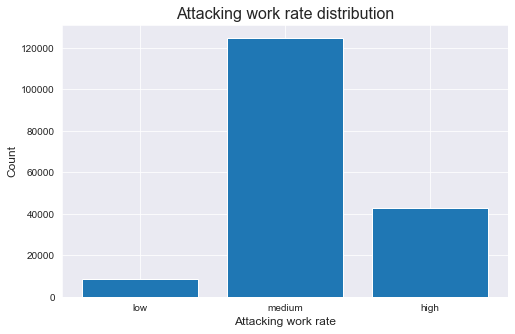

In [17]:
distribution_2(df_att, 'attacking_work_rate')

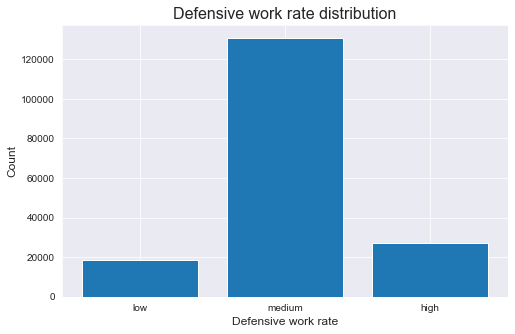

In [18]:
distribution_2(df_att, 'defensive_work_rate')

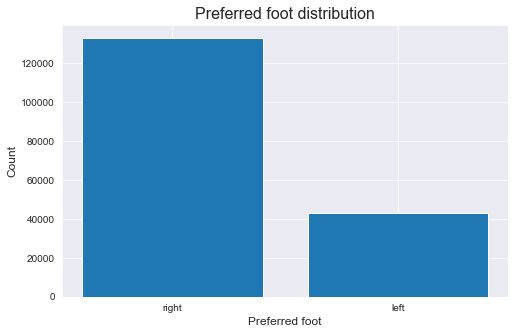

In [19]:
distribution_2(df_att, 'preferred_foot', order=False)

> These plots indicates a normal distribution for the ordinal variables. And it shows that most players user their right foot as the preferred one.

## Bivariate Exploration

> The correlation between two vairables will be introduced here such as the two age and weight and the players' attributes.



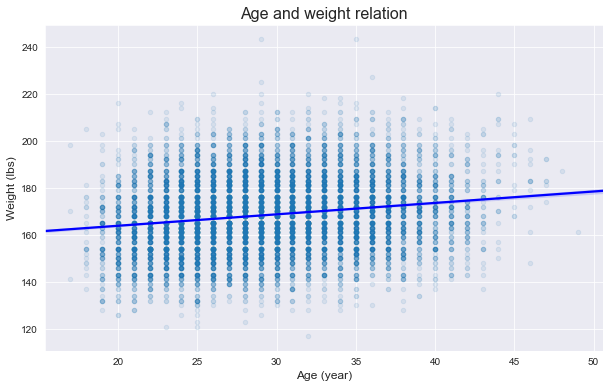

In [20]:
plt.figure(figsize=(10,6))
# regression plot
sb.regplot(data = df_player, x = 'age', y = 'weight', truncate=False, scatter_kws={'s':20, 'alpha':1/10}, line_kws={'color':'blue'});
plt.title('Age and weight relation', fontsize=16)
plt.xlabel('Age (year)', fontsize=12)
plt.ylabel('Weight (lbs)', fontsize=12);

> This plot shows a positive relation between the age and the weight.

Now, it's time to see the effect of the age on the overall score of the players. Interesting!

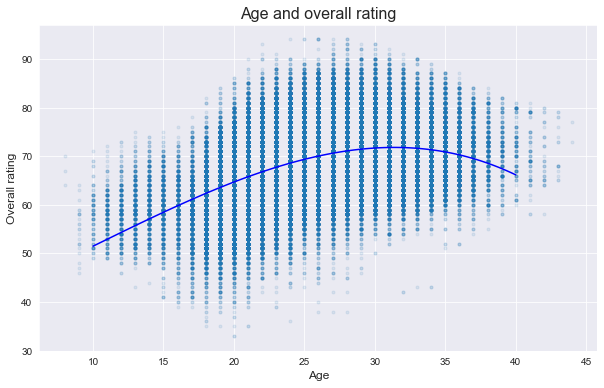

In [21]:
plt.figure(figsize=(10,6))
# scatter plot
plt.plot('age', 'overall_rating', data = df_att, linestyle='none', marker='o' , markersize=3, alpha=1/10)
plt.title('Age and overall rating', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Overall rating', fontsize=12);
# create the polynomial fitting
mymodel = np.poly1d(np.polyfit(df_att['age'], df_att['overall_rating'], 3))
myline = np.linspace(10, 40, 100)
plt.plot(myline, mymodel(myline), color='b');

> This plot shows clearly the non-linear relation between the age and the overall rating where it gets its peak at the age of 30 where its very close to the mode of the age distribution!

Let's move to the attributes and see how they affect each other including the age factor.

In [22]:
# keep the attributes only
df_att_only = df_att.drop(columns = ['id', 'player_fifa_api_id', 'player_api_id'])
plt.figure(figsize=(20, 16), dpi=600);
plt.title('Linear correlation coeeficient between the attributes', fontsize=16)
sb.heatmap(df_att_only.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

> From this plot, it can be seen that ther overall rating is affected by two skills, the potential and the reactions. And the ball control is related to both the short passing and drippling (it's logic). And all goal keeping skills are negatively correlated with the other skills. A negative relation is observed between the acceleration and the strength which focuses on the tradeoff between both. Please not that, this heat map just gives the linear correlation coeeficient.

These are just numbers, let's see some graphs to tell more about the story especially the effect of the potential and the reactions skills on the the overall rating.

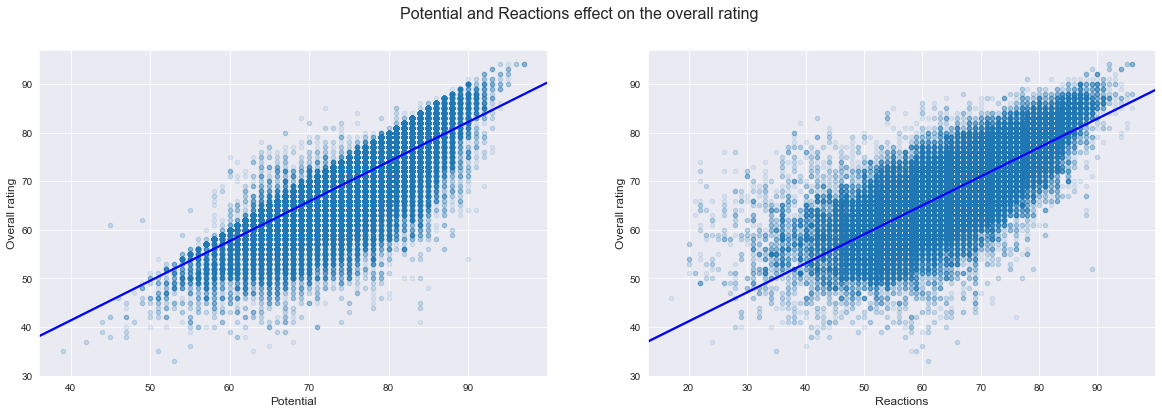

In [23]:
plt.figure(figsize = [20, 6])
plt.suptitle('Potential and Reactions effect on the overall rating', fontsize=16)
# first plot
plt.subplot(1, 2, 1) 
sb.regplot(data = df_att, x = 'potential', y = 'overall_rating', truncate=False, scatter_kws={'s':20, 'alpha':1/10}, line_kws={'color':'blue'});
plt.xlabel('Potential', fontsize=12)
plt.ylabel('Overall rating', fontsize=12)
# second plot
plt.subplot(1, 2, 2) 
sb.regplot(data = df_att, x = 'reactions', y = 'overall_rating', truncate=False, scatter_kws={'s':20, 'alpha':1/10}, line_kws={'color':'blue'});
plt.xlabel('Reactions', fontsize=12)
plt.ylabel('Overall rating', fontsize=12);

> Perfect!, the relation is strong positive relation between the two skills and the overall rating

But the inclined edge of the potential plot is weird, let's try a diffrent plot to see why.

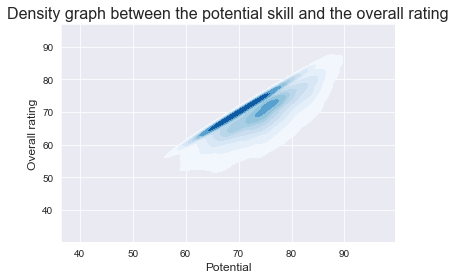

In [24]:
# 2d density graph
sb.kdeplot(data = df_att, x="potential", y="overall_rating", cmap="Blues", shade=True)
plt.title('Density graph between the potential skill and the overall rating', fontsize=16)
plt.xlabel('Potential', fontsize=12);
plt.ylabel('Overall rating', fontsize=12);

> Aha, it seems that the relation can be divided into two categories, one for the dark red area, and the other for light red area. This needs more investigation to discover the attributes related to those two categories. Which might be discoverd in the multivariate section.

Let's see the distribution of the reactions skill to compare

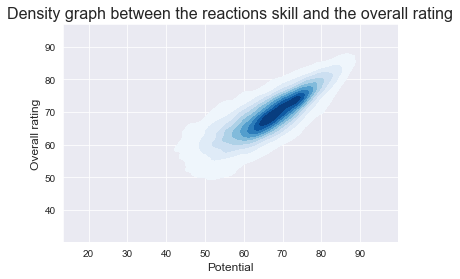

In [35]:
# 2d density graph
sb.kdeplot(data = df_att, x="reactions", y="overall_rating", cmap="Blues", shade=True)
plt.title('Density graph between the reactions skill and the overall rating', fontsize=16)
plt.xlabel('Potential', fontsize=12);
plt.ylabel('Overall rating', fontsize=12);

> This is the normal distribution which indicates the odd relation in the previous plot of the potential skill.

Before moving to the multivariate analysis, let's discover the porportions of the different groups of work rate

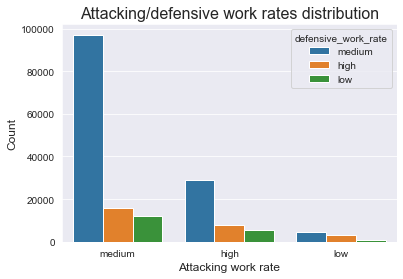

In [26]:
# bar chart
sb.countplot(data = df_att, x = 'attacking_work_rate', hue = 'defensive_work_rate')
plt.title('Attacking/defensive work rates distribution', fontsize=16)
plt.xlabel('Attacking work rate', fontsize=12)
plt.ylabel('Count', fontsize=12);

> It seems that most players has a medium attacking and defensive work rate then followed by medium defensive rate with high attacking rate. Surprisingly, there are lots of players that have high attacking and defensive work rates.

Let's see if there is a difference in the distribution

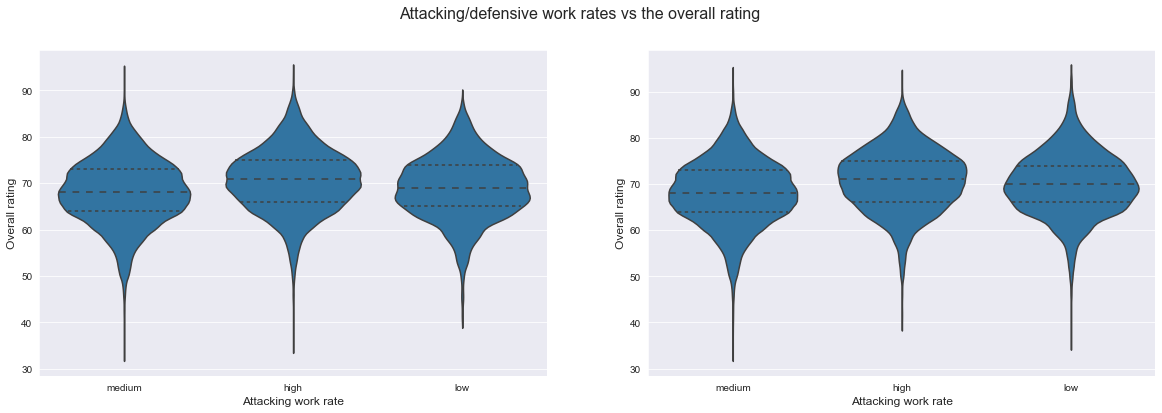

In [27]:
# violin plots
plt.figure(figsize = [20, 6]) 
plt.suptitle('Attacking/defensive work rates vs the overall rating', fontsize=16)
# first plot
plt.subplot(1, 2, 1)
sb.violinplot(data=df_att, x='attacking_work_rate', y='overall_rating', color=sb.color_palette()[0], inner='quartile');
plt.xlabel('Attacking work rate', fontsize=12)
plt.ylabel('Overall rating', fontsize=12)
# second plot
plt.subplot(1, 2, 2)
sb.violinplot(data=df_att, x='defensive_work_rate', y='overall_rating', color=sb.color_palette()[0], inner='quartile');
plt.xlabel('Attacking work rate', fontsize=12)
plt.ylabel('Overall rating', fontsize=12);

> All plots have the same normal effect on the overall rating

## Multivariate Exploration

Let's dig deep into the attributes and see if there is any relation to the categorical varibales to the overall rating

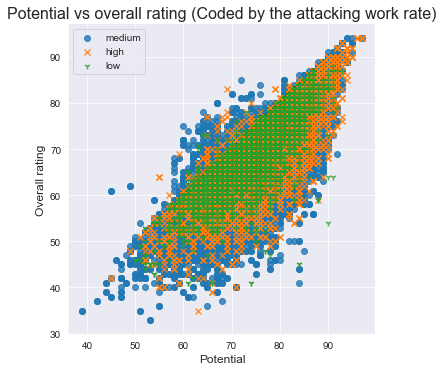

In [28]:
# scatter plot
sb.lmplot( x="potential", y="overall_rating", data=df_att, fit_reg=False, hue='attacking_work_rate', legend=False, markers=["o", "x", "1"])
plt.legend(loc='upper left');
plt.title('Potential vs overall rating (Coded by the attacking work rate)', fontsize=16)
plt.xlabel('Potential', fontsize=12)
plt.ylabel('Overall rating', fontsize=12);

> This plot is not clear, let's separate the groups

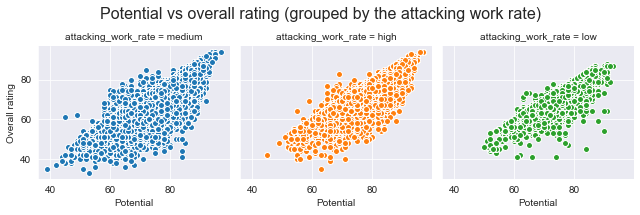

In [29]:
# faceting the plots
g = sb.FacetGrid(df_att, col="attacking_work_rate", hue="attacking_work_rate")
g = (g.map(plt.scatter, "potential", "overall_rating", edgecolor="w"))
g.set_xlabels('Potential')
g.set_ylabels('Overall rating')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Potential vs overall rating (grouped by the attacking work rate)',fontsize=16);

> It does not seem that the attacking work rate affects this.

Let's see if the defensive work rate has an effect

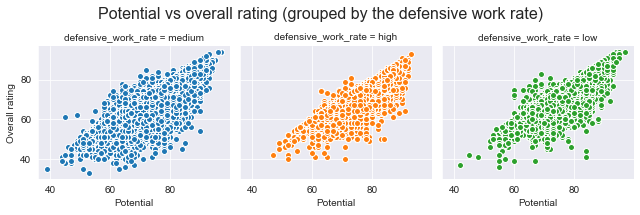

In [30]:
# separate the groups
g = sb.FacetGrid(df_att, col="defensive_work_rate", hue="defensive_work_rate")
g = (g.map(plt.scatter, "potential", "overall_rating", edgecolor="w"))
g.set_xlabels('Potential')
g.set_ylabels('Overall rating')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Potential vs overall rating (grouped by the defensive work rate)', fontsize=16);

> Again, it has no effect and still the upper edge still exist in all plots. This may lead to a conclusion that there is too much data where the potential value is entered equals the overall rating as default value.

In [31]:
df_att.query('potential == overall_rating')['id'].count()/183978*100

23.644131363532598

> This is a very large number **(24%)** to have the potentail be exactly the same value as the overall rating which supports that it might by entered by default as the same value as the overall rating. Let's see this value for another attribute.

In [32]:
df_att.query('potential == reactions')['id'].count()/183978*100

4.066790594527606

> Here it's much less than the previous one **(4% compared to 24%)**.

Let's move to the age factor again by considering both the attacking and defensive work rates

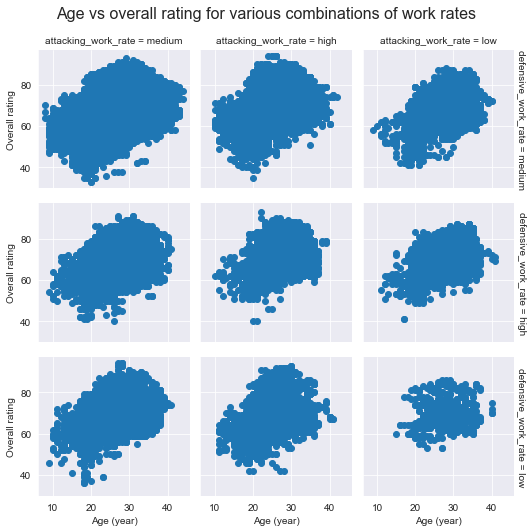

In [33]:
g = sb.FacetGrid(data = df_att, col = 'attacking_work_rate', row = 'defensive_work_rate', height = 2.5,
                 margin_titles = True)
g.map(plt.scatter, 'age', 'overall_rating')
g.set_xlabels('Age (year)')
g.set_ylabels('Overall rating')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Age vs overall rating for various combinations of work rates', fontsize=16);

> Interseting thing that in most plots the relation is linear except for the medium-medium group which corresponds to a huge part of the data as indicated from the bivariate charts. So, it's more preferable to split the data as above and don't make a general conclusion about the effect of the age on the overall rating of the player.

Finally, does the two work rates affect the overall rating of the player without taking the age factor into considerations?

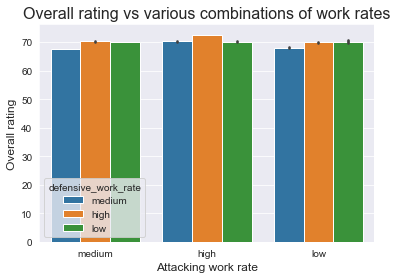

In [34]:
# clustered bar chart
sb.barplot(data = df_att, x = 'attacking_work_rate', y = 'overall_rating', hue = 'defensive_work_rate')
plt.title('Overall rating vs various combinations of work rates', fontsize=16)
plt.xlabel('Attacking work rate', fontsize=12)
plt.ylabel('Overall rating', fontsize=12);

> This chart shows no correlation between the two work_rates and the overall rating as it is almost consistent at a score of 70. Another way to prove there is no relation, as the low-low group (the most right column) shows a score of 70 for the average overall rating of the players which should be smaller if there was a relation. But from the previous chart, the work rate has an effect on the relation between the age and the overall rating as it gets more linear when it gets away from the medium work rates.

## Conclusion

> As a final note, the overall rating of the player is affected by some factors including the age and the potentail and reactions skills which should be the focus for further inferetial studies to tell if these factors are significant or not.